In [86]:
import numpy as np
import matplotlib
matplotlib.usetex=True
from astropy import units as u
from astropy.coordinates import CartesianRepresentation, SphericalRepresentation, Angle, SkyCoord
%config InlineBackend.figure_format = 'retina'

In [87]:
%matplotlib inline
from matplotlib import pyplot as plt


# PART 1: Using the subhalo abundance functions from Dooley et al. (2016), the predicted number of satellites $M_* > 3\times10^4 M_{\odot}$ around M33 ($M_{*} = 3 \times 10^9 M_{\odot}$) is ~8. 

In [88]:
n = 10000
rvir = 161.
d = 794.
x, y, z = (np.random.rand(3, n)*2-1)* rvir * u.kpc
cr = CartesianRepresentation(x, y, z)
cr = cr[cr.represent_as(SphericalRepresentation).distance<rvir*u.kpc]

In [89]:
m33 = SkyCoord(SkyCoord.from_name('M33'), distance=d*u.kpc)
print m33
m33.cartesian

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    ( 23.4621,  30.6599417,  794.)>


<CartesianRepresentation (x, y, z) in kpc
    ( 626.53750446,  271.93360492,  404.89365274)>

In [90]:
cr = CartesianRepresentation(cr.x + m33.cartesian.x, 
                             cr.y + m33.cartesian.y, 
                             cr.z + m33.cartesian.z)
sr = cr.represent_as(SphericalRepresentation)

## What fraction of predicted satellites (~8) should exist within the PAndAS footprint after you remove the region obscured by M33's optical disk?

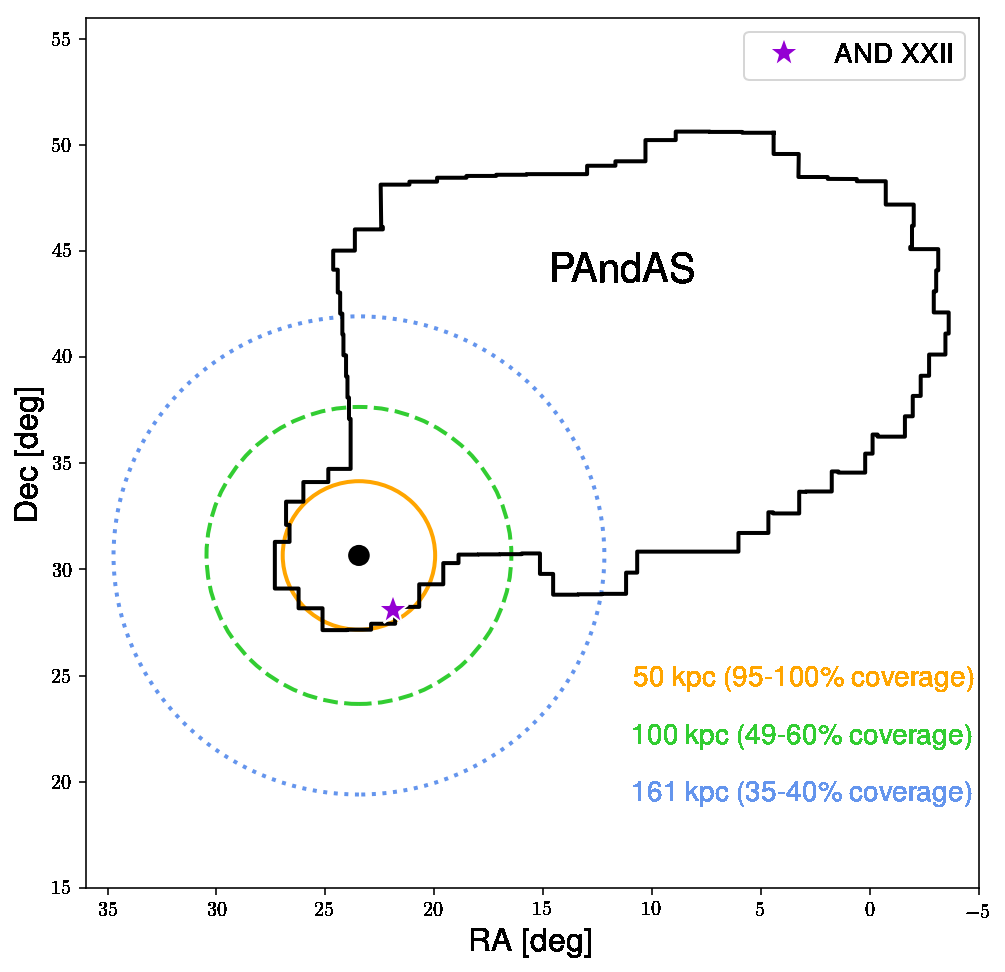

In [91]:
fieldcen = m33
infield1 = fieldcen.separation(SkyCoord(sr)) < 3.5*u.deg #PAndAS radius around M33 
infield2 = fieldcen.separation(SkyCoord(sr)) > 0.45*u.deg # 3x optical disk scale length 
infield = infield1 & infield2

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
x = sr.lon.wrap_at(180*u.deg).deg
y = sr.lat.deg
#plt.scatter(x, y, marker='.', edgecolor='None', color='cornflowerblue', s=30)
#plt.scatter(x[infield], y[infield], marker='.', color='orange')
plt.xlabel('RA [deg]', fontsize=16)
plt.ylabel('Dec [deg]', fontsize=16)
and22 = SkyCoord('01h27m40.0s','28d05m25s', unit='deg')
m33 = SkyCoord('01h33m50.0s','30d39m37s', unit='deg')
m31 = SkyCoord('0h42m44.3s', '41d16m9s', unit='deg')
#plt.plot(m33.ra.deg, m33.dec.deg, 'ko', ms=16, zorder=5)
plt.plot(and22.ra.deg, and22.dec.deg, '*', color='darkviolet' ,mec='white',ms=16, label='AND XXII', zorder=5)


dp = np.loadtxt('corners_PAndAS11.txt')
ra = dp[:,0]
dec = dp[:,1]
plt.plot(ra, dec, lw=2, color='k')
plt.xlim(*plt.xlim()[::-1])
plt.figtext(0.53, 0.65, 'PAndAS', fontsize=20, color='k')
matplotlib.rcParams['font.size'] = 14
circle= plt.Circle((m33.ra.deg, m33.dec.deg), 3.5, fill=False, color='orange', lw=2, label='50 kpc')
circle2 = plt.Circle((m33.ra.deg, m33.dec.deg), 3.5*rvir/50., fill=False, color='cornflowerblue', lw=2, ls=':')
circle3 = plt.Circle((m33.ra.deg, m33.dec.deg), 3.5*100./50., fill=False, color='limegreen', lw=2, ls='--')
ax.add_artist(circle)
ax.add_artist(circle2)
ax.add_artist(circle3)
circle4 = plt.Circle((m33.ra.deg, m33.dec.deg), 0.45,  color='k')
ax.add_artist(circle4)
circle5 = plt.Circle((m31.ra.deg, m31.dec.deg), 0.5,  color='crimson')
#ax.add_artist(circle5)
plt.xlim(36,-5)
plt.ylim(15,56)
plt.legend(numpoints=1)
plt.figtext(0.6, 0.3, '50 kpc (95-100\% coverage)', color='orange')
plt.figtext(0.6, 0.25, '100 kpc (49-60\% coverage)', color='limegreen')
plt.figtext(0.6, 0.2, '161 kpc (35-40\% coverage)', color='cornflowerblue')
#plt.savefig('M33_PAndAS_sat_estimate_prelim.pdf')
plt.savefig('M33_PAndAS_coverage.pdf')

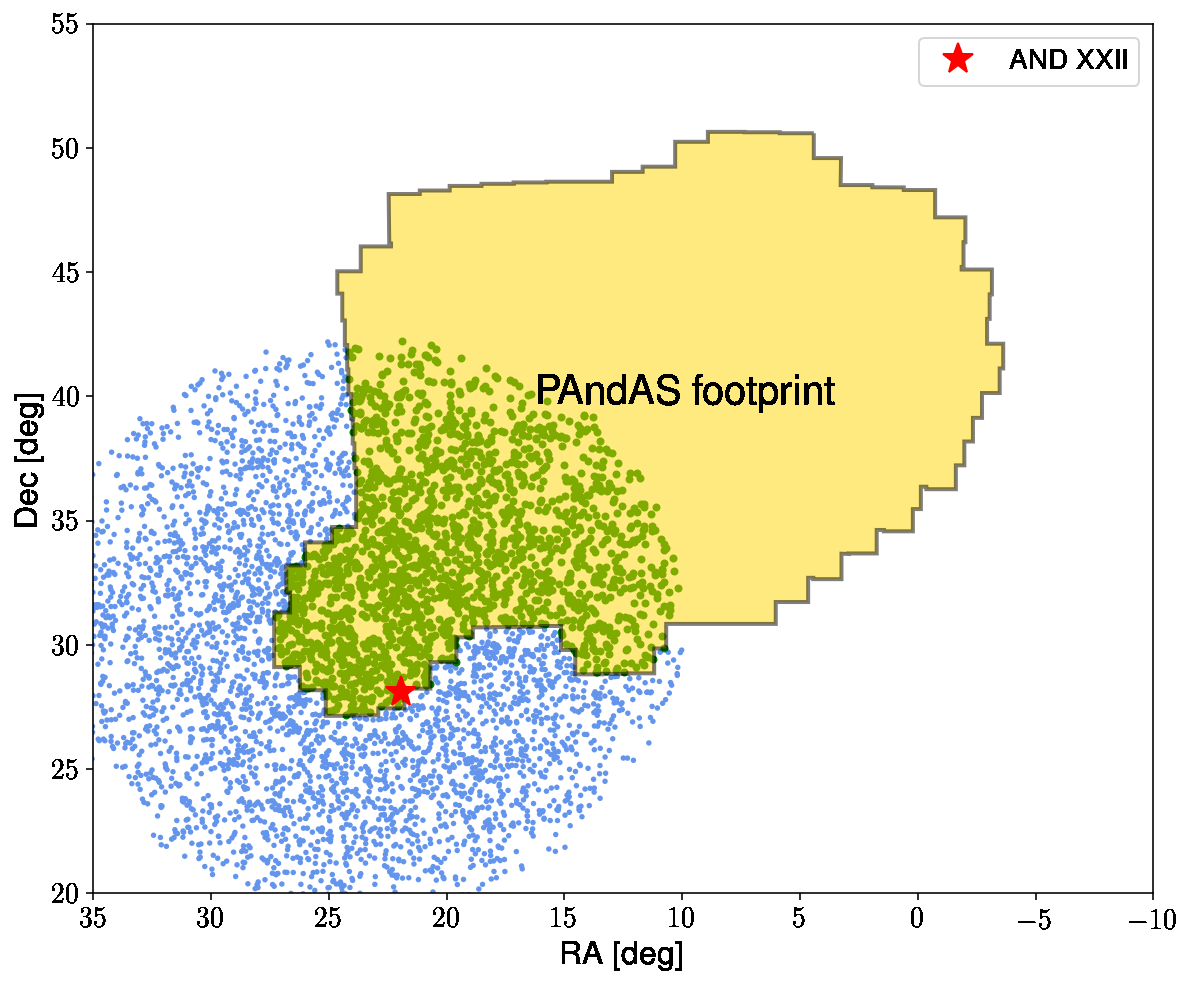

In [92]:
# create path object of PAndAS map
from matplotlib.path import Path
import matplotlib.patches as patches

coords = zip(ra,dec)
#print coords
path = Path(coords)
fig = plt.figure(figsize=(9.5,8))
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, lw=2, facecolor='gold', alpha=0.5)
ax.add_patch(patch)
plt.scatter(x[infield2], y[infield2], marker='.', edgecolor='None', color='cornflowerblue', s=30)
ax.set_xlim(35,-10)
ax.set_ylim(20,55)
plt.figtext(0.45, 0.55, 'PAndAS footprint', fontsize=20, color='k')#, xy=(10,40), xytext='None', coords='data')

plt.xlabel('RA [deg]', fontsize=16)
plt.ylabel('Dec [deg]', fontsize=16)
#figure out how to ask if a point is in the path or not
infield = path.contains_points(zip(x,y))
plt.plot(and22.ra.deg, and22.dec.deg, 'r*', ms=16, label='AND XXII', zorder=5)
plt.legend(numpoints=1)
plt.scatter(x[infield & infield2], y[infield & infield2], marker='.', color='green')
plt.savefig('M33_PAndAS_sat_estimate.png')
#print fieldcen.separation(SkyCoord(sr))*u.deg

In [93]:
#distances of 794, 880, 968 kpc
#fraction of Pandas footprint contained in spherical rvir (161 kpc) = 35%, 38%, 40%
#fraction of Pandas footprint contained in spherical rvir (100 kpc) = 49%, 53%, 60%
np.sum(infield) / float(len(infield)) 

0.36567886887468526

## RESULTS: ~46% of predicted sats (4 sats) should be in the PAndAS FOV if all M33 satellites are intact due to a first infall scenario. This does account for the extra coverage in the direction of M31. (Our earlier rough estimate without complete PAndAS coverage was 27%.)

In [94]:
#################################################################################################################

# PART 2:  If M33 had a recent encounter with M31 at a pericentric distance of 50 kpc, the tidal radius of M33 is approximately 26 kpc. 

# 1. What fraction of predicted satellites would M33 retain in a close encounter scenario? 

# 2. Should they be visible in the PAndAS FOV? (Note this tidal radius implies M33 should be very strongly truncated today.)

In [95]:
print d
peris = [50., 100., 150.]
rts = [29.2, 52.6, 73.1] # when you account for host mass enclosed at peri)
peridegs = [np.arctan(rt/d)*(180./np.pi) for rt in rts]
print peridegs

794.0
[2.1061500432480966, 3.7901269566648423, 5.2601357941553646]


In [96]:
for perideg in peridegs:
    infield3 = fieldcen.separation(SkyCoord(sr)) < perideg*u.deg
    newinfield = infield2 & infield3
    frac = np.sum(newinfield) / float(len(newinfield))
    print frac

0.0497772612822
0.159984505133
0.299825682743


In [97]:
numsats = 8. * frac 
print numsats

2.39860546194


# r_peri (50 kpc) = 6.4% (None!), r_peri (100 kpc) = 16.5% (~1 sat), r_peri (150 kpc) = 29% (~2 sat)

Consequences for recent pericentric passage:

1. In a 50 kpc pericentric passage, AND XXII should not be a true satellite of M33 and its disk should be truncated today. 

2. In a 100 kpc pericentric passage, AND XXII should be a true satellite of M33.

3. In a 150 kpc pericentric passage, AND XXII should be a true satellite of M33 but PAndAS should also detect one more. At this distance, the warps may not be purely due to tides.

Consequences for first infall:
1. If AND XXII is an M33 satellite, 3 others should also be visible within the PAndAS FOV.
2. Approximately 4 additional M33 satellites should reside outside of the PAndAS FOV.

*** <i> All results assume that the radial satellite distribution function is flat. <i>

In [98]:
#What would be expected from PANSTARRS (M_V = -9) and SDSS?

In [99]:
# use path.path to make object and use contain_points --> use this instead of the percentage method above to check if random point is iwtin PAndAS footprint
